In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append("../")
DATA_PATH = '../data/'

## Data

In [25]:
k = 0.0001
sampled_data = pd.read_pickle(DATA_PATH + 'train_data.pkl').sample(frac=k, random_state=137)
# sample size

In [35]:
# scaling data
%load_ext autoreload
%autoreload 2
from data_pipeline import data_pipeline_limited

# split on train and test
from sklearn.model_selection import train_test_split

pipeline = data_pipeline()

data = sampled_data
unused_labels = [
    'index',
]
data = data.drop(data[unused_labels], axis=1)
data = data.astype(np.float32)

data.info()
label_names = [
    'is_downstream_reconstructible'
]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 1042314 to 2016064
Data columns (total 9 columns):
is_downstream_reconstructible    193 non-null float32
seed_chi2PerDoF                  193 non-null float32
seed_p                           193 non-null float32
seed_pt                          193 non-null float32
seed_nLHCbIDs                    193 non-null float32
seed_x                           193 non-null float32
seed_y                           193 non-null float32
seed_tx                          193 non-null float32
seed_ty                          193 non-null float32
dtypes: float32(9)
memory usage: 8.3 KB


### full model

In [ ]:
x_train = train_set.drop(label_names, axis=1)
y_train = train_set[label_names].copy().astype(np.int32)

x_test = test_set.drop(label_names, axis=1)
y_test = test_set[label_names].copy().astype(np.int32)

In [ ]:
_ = x_train.hist(bins=50, figsize=(10,10))

In [ ]:
_ = x_test.hist(bins=50, figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7257c7be0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc7203da2e8>]], dtype=object)

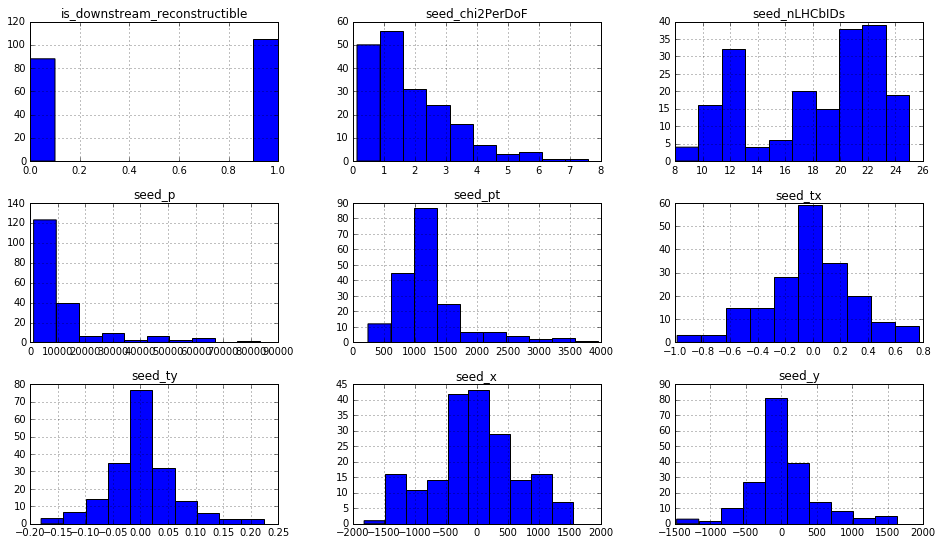

In [37]:
data.hist(figsize=(16,9))

In [28]:
from models import KerasDNN

In [ ]:
from keras.callbacks import TensorBoard
DNNclf = KerasDNN(
    (x_train.shape[1],),
    (2,),
    neurons=100,
    layers=3,
#     dropout=0.05,
    loss_metric='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    last_layer_act='softmax'
)
DNNclf.fit(
    x_train.values, y_train.values,
    epochs=8,
    validation_data=(x_test.values, y_test.values),
#     callbacks=[Tensorboard()]
)

In [18]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test.values, DNNclf.predict_proba(x_test.values)[:,1] )

0.92527975956703357

In [ ]:
x_train_11 = x_train - x_train.min()

x_test_11 = x_test - x_train.min()

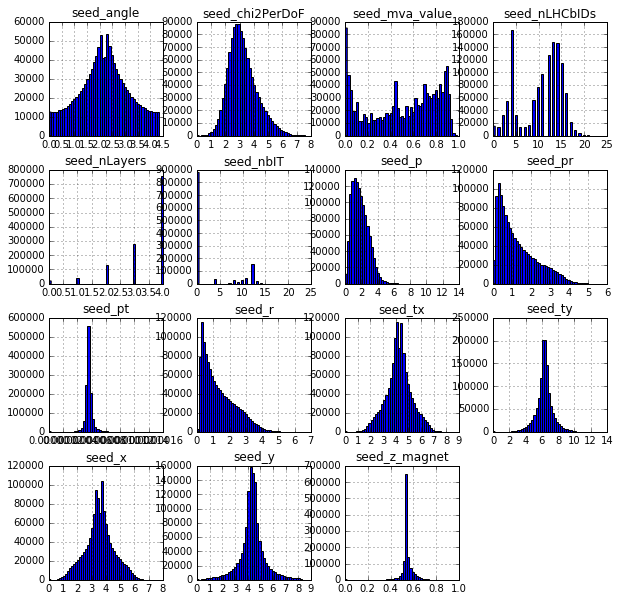

In [17]:
_ = x_train_11.hist(bins=50, figsize=(10,10))

In [ ]:
DNNclf_11 = KerasDNN(
    (x_train_11.shape[1],),
    (2,),
    neurons=100,
    layers=3,
#     dropout=0.05,
    loss_metric='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    last_layer_act='softmax'
)
DNNclf_11.fit(
    x_train_11.values, y_train.values,
    epochs=8,
    validation_data=(x_test_11.values, y_test.values),
#     callbacks=[Tensorboard()]
)

In [19]:
roc_auc_score(y_test.values, DNNclf_11.predict_proba(x_test_11.values)[:,1] )

0.90579343280842062

### limited features

In [29]:
unused_features = ['seed_z_magnet', 'seed_mva_value', 'seed_nbIT', 'seed_nLayers', 'seed_angle']

In [30]:
from sklearn.metrics import roc_auc_score

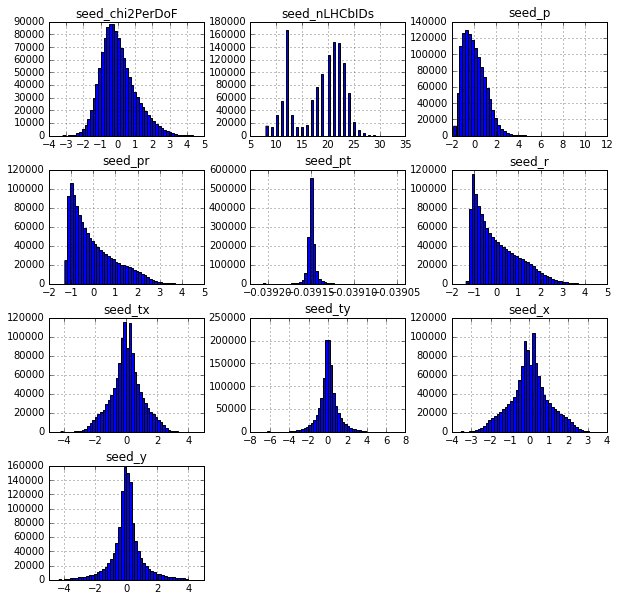

In [21]:
_ = x_train_2.hist(bins=50, figsize=(10,10))

In [22]:
from keras.callbacks import TensorBoard
DNNclf_2 = KerasDNN(
    (x_train_2.shape[1],),
    (2,),
    neurons=100,
    layers=3,
#     dropout=0.05,
    loss_metric='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    last_layer_act='softmax'
)
DNNclf_2.fit(
    x_train_2.values, y_train.values,
    epochs=8,
    validation_data=(x_test_2.values, y_test.values),
#     callbacks=[Tensorboard()]
)

Train on 1228400 samples, validate on 526366 samples
Epoch 1/8
1228400/1228400 [==============================] - 133s - loss: 0.3964 - acc: 0.8305 - val_loss: 0.3485 - val_acc: 0.8604
Epoch 2/8
1228400/1228400 [==============================] - 130s - loss: 0.3609 - acc: 0.8511 - val_loss: 0.3632 - val_acc: 0.8494
Epoch 3/8
1228400/1228400 [==============================] - 128s - loss: 0.3521 - acc: 0.8561 - val_loss: 0.3515 - val_acc: 0.8592
Epoch 4/8
1228400/1228400 [==============================] - 121s - loss: 0.3473 - acc: 0.8586 - val_loss: 0.3433 - val_acc: 0.8599
Epoch 5/8
1228400/1228400 [==============================] - 128s - loss: 0.3441 - acc: 0.8603 - val_loss: 0.3406 - val_acc: 0.8647
Epoch 6/8
1228400/1228400 [==============================] - 125s - loss: 0.3417 - acc: 0.8618 - val_loss: 0.3390 - val_acc: 0.8673
Epoch 7/8
1228400/1228400 [==============================] - 138s - loss: 0.3402 - acc: 0.8625 - val_loss: 0.3340 - val_acc: 0.8697
Epoch 8/8
1228400/12284

### abs transorm

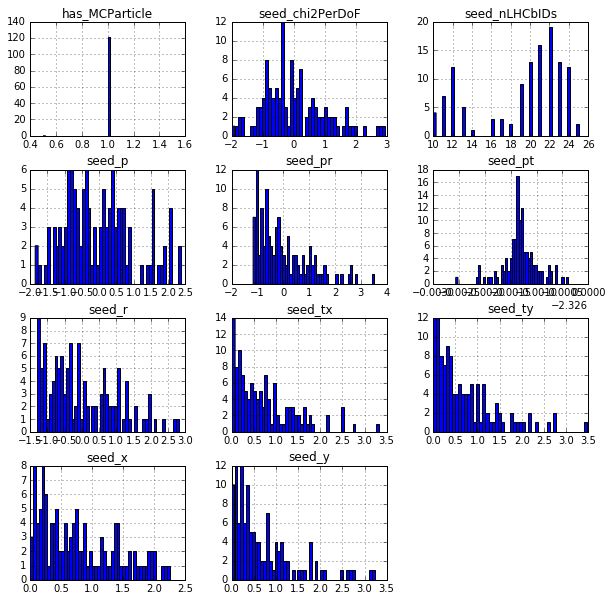

In [38]:
_ = x_train_3.hist(bins=50, figsize=(10,10))

In [31]:
x_train_3 = train_set.drop(label_names + unused_features, axis=1)
x_train_3.loc[:,['seed_x', 'seed_y', 'seed_tx', 'seed_ty']] = np.abs(x_train_3[['seed_x', 'seed_y', 'seed_tx', 'seed_ty']])
x_test_3 = test_set.drop(label_names + unused_features, axis=1)
x_test_3.loc[:,['seed_x', 'seed_y', 'seed_tx', 'seed_ty']] = np.abs(x_test_3[['seed_x', 'seed_y', 'seed_tx', 'seed_ty']])

ValueError: labels ['seed_z_magnet' 'seed_mva_value' 'seed_angle'] not contained in axis

In [14]:
DNNclf_3 = KerasDNN(
    (x_train_3.shape[1],),
    (2,),
    neurons=100,
    layers=3,
#     dropout=0.05,
    loss_metric='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    last_layer_act='softmax'
)
# DNNclf_3.fit(
#     x_train_3.values, y_train.values,
#     epochs=8,
#     validation_data=(x_test_3.values, y_test.values),
# #     callbacks=[Tensorboard()]
# )

In [15]:
from sklearn.pipeline import make_pipeline

full_pipeline = make_pipeline([
    pipeline,
    DNNclf_3
])

TypeError: Last step of Pipeline should implement fit. '[Pipeline(memory=None,
     steps=[('dropFalseMCParticles', dropFalseMCParticles()), ('angle', addAngle()), ('pseudo rapidity', addPR()), ('z magnet', addZ()), ('radius', addR()), ('y', yScale()), ('x', xScale()), ('ty', tyScale()), ('tx', txScale()), ('nbIT', nbITScale()), ('nLayers', nLayersScale()), ('nLHCbIDs', nLHCbIDsScale()), ('pt', ptScale()), ('p', pScale()), ('chi2PerDoF', chi2PerDoFScaler())]), <models.KerasDNN object at 0x7fc725c55e80>]' (type <class 'list'>) doesn't

In [ ]:
from hep_ml.speedup import LookupClassifier 

In [ ]:
lc = LookupClassifier(base_estimator=DNNclf_3)

In [ ]:

roc_auc_score(y_test.values, DNNclf_3.predict_proba(x_test_3.values)[:,1] )

In [40]:
roc_auc_score(y_test_q.values, DNNclf_q_2.predict_proba(x_test_q_2)[:,1] )

0.92090135215607027

In [39]:
DNNclf_q_2 = KerasDNN(
    (x_train_q_2.shape[1],),
    (2,),
    neurons=100,
    layers=3,
#     dropout=0.05,
    loss_metric='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    last_layer_act='softmax'
)
DNNclf_q_2.fit(
    x_train_q_2, y_train_q.values,
    epochs=8,
    validation_data=(x_test_q_2, y_test_q.values),
#     callbacks=[Tensorboard()]
)

Train on 1228400 samples, validate on 526366 samples
Epoch 1/8
1228400/1228400 [==============================] - 145s - loss: 0.4145 - acc: 0.8167 - val_loss: 0.3916 - val_acc: 0.8337
Epoch 2/8
1228400/1228400 [==============================] - 142s - loss: 0.3765 - acc: 0.8402 - val_loss: 0.3940 - val_acc: 0.8301
Epoch 3/8
1228400/1228400 [==============================] - 141s - loss: 0.3698 - acc: 0.8444 - val_loss: 0.3480 - val_acc: 0.8557
Epoch 4/8
1228400/1228400 [==============================] - 141s - loss: 0.3612 - acc: 0.8496 - val_loss: 0.3514 - val_acc: 0.8557
Epoch 5/8
1228400/1228400 [==============================] - 141s - loss: 0.3555 - acc: 0.8528 - val_loss: 0.3481 - val_acc: 0.8563
Epoch 6/8
1228400/1228400 [==============================] - 141s - loss: 0.3521 - acc: 0.8549 - val_loss: 0.3418 - val_acc: 0.8602
Epoch 7/8
1228400/1228400 [==============================] - 143s - loss: 0.3507 - acc: 0.8555 - val_loss: 0.3387 - val_acc: 0.8649
Epoch 8/8
  17280/12284

KeyboardInterrupt: 

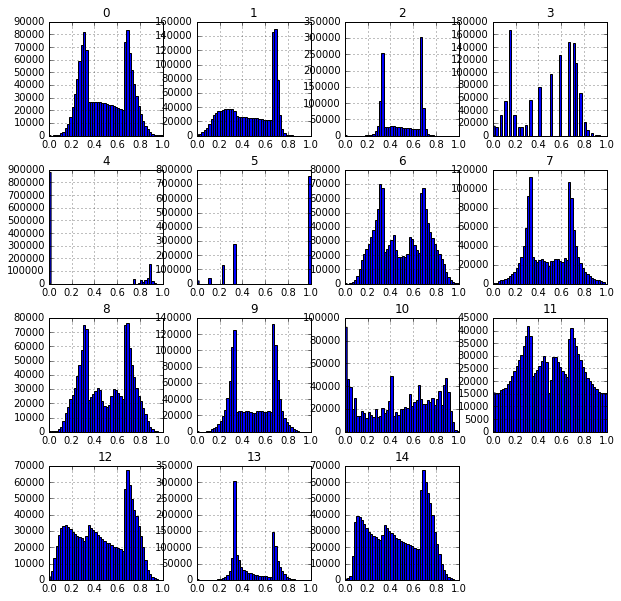

In [38]:
_ = pd.DataFrame(x_train_q_2).hist(bins=50, figsize=(10,10))

In [37]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles=4)
x_train_q_2 = qt.fit_transform(x_train_q)
x_test_q_2 = qt.transform(x_test_q)

In [36]:
pipeline_q = data_pipeline_basic()
train_set_q, test_set_q = train_test_split(data, test_size=0.3, random_state=42)

train_set_q = pipeline_q.fit_transform(train_set_q)
test_set_q = pipeline_q.transform(test_set_q)

y_train_q = train_set_q[label_names].copy().astype(np.int32)
y_test_q = test_set_q[label_names].copy().astype(np.int32)

x_train_q = train_set_q.drop(label_names, axis=1)
x_test_q = test_set_q.drop(label_names, axis=1)

http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

In [35]:
roc_auc_score(y_test_q.values, DNNclf_q.predict_proba(x_test_q)[:,1] )

0.93113736488633225

In [34]:
DNNclf_q = KerasDNN(
    (x_train_q.shape[1],),
    (2,),
    neurons=100,
    layers=3,
#     dropout=0.05,
    loss_metric='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    last_layer_act='softmax'
)
DNNclf_q.fit(
    x_train_q, y_train_q.values,
    epochs=8,
    validation_data=(x_test_q, y_test_q.values),
#     callbacks=[Tensorboard()]
)

Train on 1228400 samples, validate on 526366 samples
Epoch 1/8
1228400/1228400 [==============================] - 133s - loss: 0.3862 - acc: 0.8343 - val_loss: 0.3434 - val_acc: 0.8564
Epoch 2/8
1228400/1228400 [==============================] - 135s - loss: 0.3525 - acc: 0.8544 - val_loss: 0.3608 - val_acc: 0.8474
Epoch 3/8
1228400/1228400 [==============================] - 136s - loss: 0.3433 - acc: 0.8593 - val_loss: 0.3220 - val_acc: 0.8694
Epoch 4/8
1228400/1228400 [==============================] - 139s - loss: 0.3372 - acc: 0.8628 - val_loss: 0.3410 - val_acc: 0.8624
Epoch 5/8
1228400/1228400 [==============================] - 139s - loss: 0.3348 - acc: 0.8641 - val_loss: 0.3204 - val_acc: 0.8725
Epoch 6/8
1228400/1228400 [==============================] - 144s - loss: 0.3309 - acc: 0.8659 - val_loss: 0.3162 - val_acc: 0.8728
Epoch 7/8
1228400/1228400 [==============================] - 139s - loss: 0.3291 - acc: 0.8668 - val_loss: 0.3206 - val_acc: 0.8709
Epoch 8/8
1228400/12284

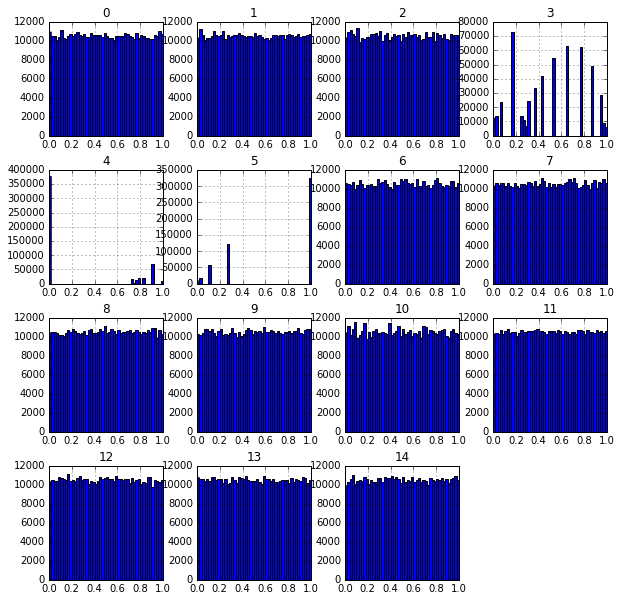

In [33]:
_ = pd.DataFrame(x_test_q).hist(bins=50, figsize=(10,10))

In [32]:
x_train_q.shape, y_train_q.shape

((1228400, 15), (1228400, 1))

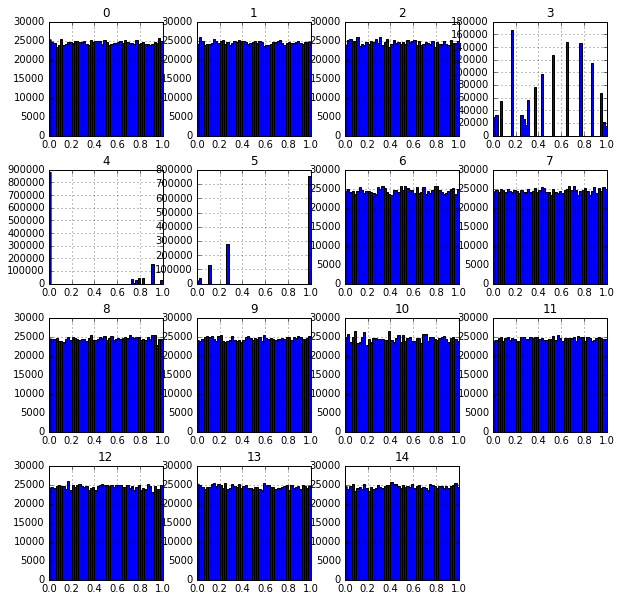

In [31]:
_ = pd.DataFrame(x_train_q).hist(bins=50, figsize=(10,10))